# Egregious Error in Title

© Explore Data Science Academy

## Learning objectives:

* Learn about Hypothesis Testing
* Learn about Type I and Type II errors
* Learn about testing the equality of means


# Introduction

The art of data science lies in understanding what story the data is telling. An important tool for doing so is **statistical inference**: figuring out, on the basis of good robust statistical analysis, what we can infer from the data about its underlying structure, and hence what we can use to make predictions about the future. Throughout the course, we'll learn many different applications of this way of thinking, so let's start now by laying the fundamentals of **hypothesis testing**. In essence, we consider our data to be the result of an experiment which allows us to confirm or reject some *a priori* hypothesis we have about some key aspect of the distribution of the underlying population.

Typically we refer to this *a priori* hypothesis as the **null hypothesis**, often denoted $H_0$. Quite often you'll see it set up as a description of what would be rather dull if it were true, and in those cases, the real excitement comes from situations where you can reject the null. For example, we might have two versions of our website marketing the Explore Data Science Academy and set up a null hypothesis that they are equally likely to result in new applicants clicking on the 'Apply Now' button. The fascinating and actionable insight would come from the data confirming that we can reject the null, based on which we would adopt the more successful version and bin the one that wasn't likely to yield results.

So how do we accept or reject a hypothesis? First of all, we need to know something about the distribution of what we're testing (in the example above, that might be the difference between the mean clickthrough rate under Web Design A and that under Web Design B, which under our null hypothesis would be zero). Then we use what we know about that distribution to determine how likely it is that our sample data would have been observed if the null hypothesis is true. If that likelihood is sufficiently low, then we conclude that we can reject the null hypothesis.

## Hypothesis testing example

Let's start the illustration of this with an example concerning one observation of a random variable with a known distribution. Suppose we know that the height of data scientists around the globe is normally distributed with a mean of 1.7 metres and a standard deviation of 10 cm. If this is the true distribution, then we can easily answer questions such as: how likely is it that a random person drawn from the population of data scientists would be 1.5m tall, or shorter? Let's compute this, and plot where on the distribution this point lies.

First, let's import the necessary packages.

In [0]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd

Now let's calculate the probability and plot the distribution.

0.022750131948179216


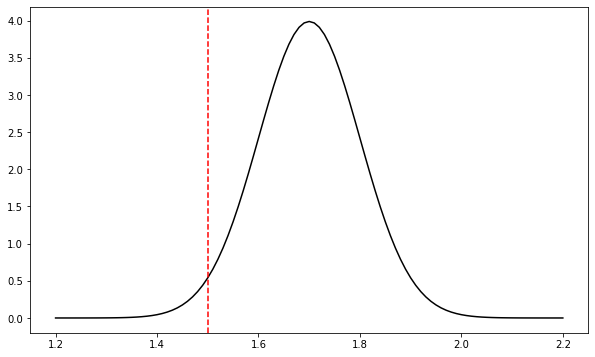

In [0]:
x = np.arange(1.2,2.2,0.01)    # range of values for height from 1.2m to 2.2m
mu = 1.7                       # mu = 1.7m
sigma = 0.1                    # sigma = 0.1m

# now calculate f(x)
f = st.norm.pdf(x, loc = mu, scale = sigma)

p = st.norm.cdf(1.5, loc = mu, scale = sigma)
print(p)     # F(1.5), i.e. probability of observing a height <= 1.5m

# plot
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(x,f,'k')
plt.axvline(x = 1.5, color = 'r', linestyle = '--')
plt.show()

We can see that only a relatively small proportion of the probability weight lies below the 1.5m mark, and our computation tells us that the probability of a random individual from this population being 1.5m tall or less is about 2.3%. So we would only expect to observe a height as low as this about once in every 44 random draws.

With hypothesis testing, we are doing pretty much the same thing, but turning things on their head a little. Here we don't know the population parameters for sure but are hypothesising what they are. The question we're asking is effectively the reverse of what we did above: given an observed sample mean, how likely is it that the hypothesised population mean is, in fact, the true population mean? To answer this question using the normal distribution, we must know what the distribution of the sample mean is, given the null hypothesis. Fortunately, we do: remember that in our introductory statistics tutorial, we learned that, given an underlying normal distribution or given a sufficiently large sample (thanks to the Central Limit Theorem), the sample mean $\bar{X} \sim N \left( \mu, \frac{\sigma^2}{n} \right)$. (If you don't remember, go back and refresh your memory. Go on, don't worry. I'll be waiting here for you.) Here $\mu$ and $\sigma^2$ are the parameters under the null hypothesis, and $n$ is the size of the sample.

To test our null hypothesis, we calculate a **test statistic**, the size of which tells us whether we can accept or reject the null. It should be clear that the data can never tell us emphatically whether or not the hypothesis is true; this is ultimately a probabilistic judgement. Maybe Web Design A is in fact just as good as Web Design B, but it just so happened that all the people who were going to apply to the Academy ended up seeing the latter rather than former$\ldots$ but this is unlikely, and that is the point. Statistical inference involves deciding how unlikely we want our data to be before we can reject the null hypothesis. This level of likelihood is known as the **significance level**: if there is less than a 5% chance of having observed our data by chance if the null hypothesis is true, then we say that our outcome is significant at the 5% level (which is a common choice of cut-off in practice, though one should be wary of applying this mindlessly).

In pre-computing days (and perhaps in university statistics exams$\ldots$), this test statistic would have been compared with standard tables which set out critical points associated with different significance levels. In the case of the normal distribution which we use when the population variance is known, the test statistic is a $Z$-statistic. Let's suppose that our null hypothesis uses those same parameters, and we conduct a sample among the 100 Academy students and observe a sample mean of 1.682m. Then our $Z$-statistic is computed as follows:

$$Z = \displaystyle \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}} = \frac{1.682 - 1.7}{\frac{0.1}{10}} = \frac{-0.018}{0.01} = -1.8.$$

(Interpret the statistic as follows: it's telling you how many standard deviations away from the hypothesised mean the sample mean lies. Look at the equation carefully until this is clear to you.)

Then we would go to a table like the one below and look up the value corresponding to our test statistic of -1.8, which is 0.0359. 



<img src="https://github.com/Explore-AI/Pictures/blob/master/StandardNormal.png?raw=true" alt="Drawing" style="width: 750px;"/>

These days, of course, we can simply instruct a computer to do the computations for us.

In [0]:
st.norm.cdf(1.682, loc = 1.7, scale = (0.1 / 100**0.5))

0.035930319112925664

And there is our 0.0359. So this is telling us that if the null hypothesis holds, there is only a 3.6% probability of observing a sample mean this low with a random sample of 100 students, and we might therefore have reason to be dubious about whether the true population mean is as high as 1.7m. But in order to have a real sense of the likelihood of the null hypothesis being true, we also need to be clear about what alternative hypothesis we're testing.

## One-sided vs. two-sided hypothesis tests

How we frame this alternative hypothesis determines whether our test is one-sided or two-sided. So for the null hypothesis:

$$H_0: \mu = 1.7$$

we might have as our alternative hypothesis that the true population mean is less than 1.7m:

$$H_1: \mu < 1.7,$$

or we could allow for the possibility that if it's not truly 1.7m, it might be higher or lower, in which case we would frame our alternative hypothesis as:

$$H_1: \mu \ne 1.7.$$

Suppose that we've chosen a significance level of 5% at which we will reject our null hypothesis. For our one-sided alternative hypothesis, the rejection region is the lower 5% tail, as in this region there is a more than 95% probability that the true population mean is less than 1.7m. For the two-sided hypothesis, however, we care about both the lower and upper tails, and given that the normal distribution is symmetric, our rejection region will be the 2.5% tails at both ends of the bell curve. A nice picture might help to make it clear:

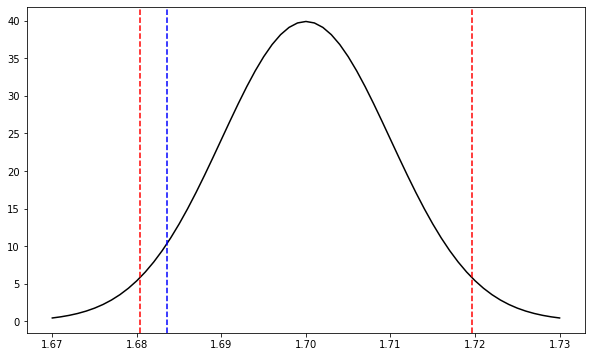

In [0]:
x = np.arange(1.67,1.73,0.001)
mu = 1.7
sigma = 0.1/10 #standard deviation / squareroot of sample size

# now calculate f(x) - standard normal
f = st.norm.pdf(x, loc = mu, scale = sigma)

r1 = st.norm.ppf(0.05, loc = mu, scale = sigma)
r2_L = st.norm.ppf(0.025, loc = mu, scale = sigma)
r2_H = st.norm.ppf(0.975, loc = mu, scale = sigma)

plt.rcParams["figure.figsize"] = (10,6)
plt.plot(x,f,'k')
plt.axvline(x = r1, color = 'b', linestyle = '--')
plt.axvline(x = r2_L, color = 'r', linestyle = '--')
plt.axvline(x = r2_H, color = 'r', linestyle = '--')
plt.show()

Any observed sample mean to the left of the blue line would lead to a rejection of the one-sided hypothesis, while any observed sample mean to the left of the leftmost red line OR to the right of the rightmost would lead to a rejection of the two-sided hypothesis.

Let's see how that would play out with our example: we have a $Z$-statistic of -1.8, which is associated with a cumulative distribution function of 0.0359. We can interpret this as follows:

* the probability (known as a $p$-value for the one-sided alternative hypothesis) of observing a sample mean as low as 1.682m, given the null hypothesis, is 0.0359. Since this is less than 0.05, we would reject the null hypothesis at a 5% significance level.

* the probability ($p$-value for the two-sided hypothesis) of observing a sample mean at least 1.8cm away from the hypothesised population mean of 1.7m is however 0.0359 + 0.0359 = 0.0718 (because of the symmetry of the normal distribution). Since this exceeds 0.05, we cannot reject the null hypothesis at the 5% level.

So which type of alternative hypothesis should you use? Well, it depends. If there is a specific reason for a one-sided hypothesis (say we're investigating take-up rates on a direct marketing offer, and we're only concerned about the risk of this being lower than our null hypothesis suggests), then that's what you'll do, but if the intention is merely to investigate whether the null hypothesis is reasonable, then generally a two-sided alternative hypothesis will be preferred.

## False positives and false negatives: Type I and Type II errors

What happens when we change the significance level? Well, as we bring it down, it becomes harder and harder to reject the null hypothesis. This reduces the risk of what are known as **false postives**, or Type I errors, if you really want to sound like a statistician: this is of course the likelihood of falsely rejecting a null hypothesis which is in fact true. This probability, by definition, is the chosen significance level, because the essence of the reasoning we've followed above is that the $p$-value reflects the probability of observing as extreme a sample mean as we have observed by chance, if the null hypothesis is true.

So reducing that risk may sound like an unambiguously good thing, until you realise that reducing the significance level simultaneously increases the risk of **false negatives** (or Type II errors), which are what happens when you accept (i.e. fail to reject) a null hypothesis which is in fact false. There is no neat mapping of significance level onto the risk of committing a Type II error. Choosing the appropriate significance level is therefore a balancing act between the risks of these two types of errors.

** Breather and leg-stretch**

OK, before we go on to other tests, take a moment to catch your breath and make sure you've understood everything up to this point. There are some fundamental principles of hypothesis testing outlined above, and you'll want to make sure that your foundation is solid before trying to build further on it.

## Testing equality of means (known population variance)

We've seen above how one would test a sample mean on the basis of a population mean, assuming that the population variance is known. Another situation in which we might have an interest is comparing two samples and testing whether or not the populations from which they're drawn have the same mean.

Suppose that we have two sample means which we denote $\bar{X}$ and $\bar{Y}$ respectively, drawn from populations with means $\mu_X$ and $\mu_Y$ and variances $\sigma^2_X$ and $\sigma^2_Y$ respectively:

$$\bar{X} \sim N \left( \mu_X, \frac{\sigma^2_X}{n_X} \right),  \bar{Y} \sim N \left( \mu_Y, \frac{\sigma^2_Y}{n_Y} \right),$$

where $n_X$ and $n_Y$ denote the sizes of the respective samples.

OK, now we're going to do a bit of maths to figure out the sampling distribution of $\bar{X} - \bar{Y}$. Don't worry, we'll be gentle :)

It is useful to know that if $X$ and $Y$ are independent, in other words if the observed value of $X$ does not in any way influence the observed value of $Y$ and vice versa, then:

$$E(XY) = E(X) E(Y),$$

where as you may recall $E(.)$ represents the expectations operator.

Now remember that the mean of a random variable $X$ is $E(X)$, and its variance is $E(X^2) - [E(X)]^2$. If $\bar{X}$ and $\bar{Y}$ are independent, which they should be, provided no data point was sampled in both, then if we let the random variable $Q = X - Y$, we have that:

$$E(Q) = E(X - Y) = E(X) - E(Y) = \mu_X - \mu_Y.$$

And for the variance of $Q$:

\begin{align}
\sigma^2_Q &= E[(X-Y)^2] - (\mu_X - \mu_Y)^2 \\
           &= E(X^2) + E(Y^2) - 2E(X)E(Y) - \mu_X^2 - \mu_Y^2 + 2\mu_X \mu_Y \\
           &= (\mu_X^2 + \sigma^2_X) + (\mu_Y^2 + \sigma^2_Y) - 2\mu_X \mu_Y - \mu_X^2 - \mu_Y^2 + 2\mu_X \mu_Y \\
           &= \sigma^2_X + \sigma^2_Y
\end{align}

Now, if we want to test for equal means, our null hypothesis is that $\mu_X = \mu_Y$, i.e. that $\mu_X - \mu_Y = 0$. From the above, and given that $\bar{X} \sim N \left( \mu_X, \frac{\sigma^2_X}{n_X} \right)$ and $\bar{Y} \sim N \left( \mu_Y, \frac{\sigma^2_Y}{n_Y} \right)$, we know that

$$\bar{X} - \bar{Y} \sim N \left( \mu_X - \mu_Y, \frac{\sigma^2_X}{n_X} + \frac{\sigma^2_Y}{n_Y} \right).$$

So, under the null hypothesis we can compute our $Z$-statistic as:

$$Z = \displaystyle \frac{\mu_X - \mu_Y}{\sqrt{ \frac{\sigma^2_X}{n_X} + \frac{\sigma^2_Y}{n_Y}}}.$$

And we then test our hypothesis in the same way as before.

# More Useful Distributions for Hypothesis Testing

## Unknown population variance: introducing the t-distribution

Up to now, we have made the rather unrealistic assumption that the population variance is known. This will pretty much never be the case. So how do we deal with it when we don't know? One feasible approach when the sample is large is simply to use the sample variance as a substitute for the population variance. But what about small samples? A little over a hundred years ago, enter William Sealy Gosset (one of the favourite statisticians of one of your lecturers, partly because of the significant contribution you're about to read about, partly because he got his flash of inspiration while working at the Guinness brewery in Dublin). You can read more about him at https://en.wikipedia.org/wiki/William_Sealy_Gosset.

<img src="http://github.com/Explore-AI/Pictures/blob/master/Gosset.jpg?raw=true" alt="Drawing" style="width: 250px;"/>

Of interest to Gosset was the question of the distribution of:

$$t = \frac{\bar{X} - \mu}{\frac{s}{\sqrt{n}}},$$

as compared to the (standard normally distributed) $Z$-statistic:

$$Z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}.$$

For large samples, the distributions become close enough that the $Z$-statistic can be used without too much concern, but for small samples, the approximation does not hold closely enough to be useful. In 1908, Gosset published the distribution of the $t$-statistic above under a pseudonym, Student, allegedly because his employers were not happy for his identity to be revealed, so you will often hear reference to Student's $t$-distribution. This distribution has an extra parameter, namely the degrees of freedom (a concept which you may remember us referring to when we looked at the concept of sample variance, but which we'll unpack further in a moment): if a random variable $X$ follows the $t$-distribution with $m$ degrees of freedom, we write that $X \sim t_m.$

Let's have a look at how this distribution with varying degrees of freedom compares to the standard normal.

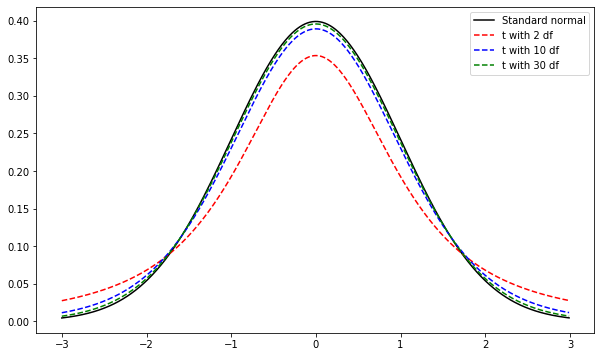

In [0]:
x = np.arange(-3,3,0.01)

# now calculate f(x) - standard normal
f_sn = st.norm.pdf(x)
f_t2 = st.t.pdf(x, df = 2)
f_t10 = st.t.pdf(x, df = 10)
f_t30 = st.t.pdf(x, df = 30)

plt.rcParams["figure.figsize"] = (10,6)
plt.plot(x, f_sn, 'k', label = "Standard normal")
plt.plot(x, f_t2, '--r', label = "t with 2 df")
plt.plot(x, f_t10, '--b', label = "t with 10 df")
plt.plot(x, f_t30, '--g', label = "t with 30 df")
plt.legend()
plt.show()

The plot clearly illustrates that as the degrees of freedom increase, the $t$-distribution gets closer and closer to the standard normal. But with smaller degrees of freedom, the curves are flatter, with greater weight in the tails.

So let's refresh our memories about degrees of freedom so that we know which $t$-distribution curve we should be using in our hypothesis testing when we don't know the population variance. Recall from our introductory statistics tutorial  that the sample variance is calculated as:

$$s^2_X = \displaystyle \frac{1}{n-1} \sum_{t=1}^n (X_t - \bar{x})^2.$$
 
The reason that we divide by $n-1$, rather than $n$, is that we lose a **degree of freedom** here because we've had to use the sample mean $\bar{x}$ as our estimate of $\mu$:  the sample mean together with $n-1$ of the observations determine the value of the $n$th observation, so this is no longer a free parameter. There is only one possible value that that $n$th observation can take, given the other observations and the sample mean. 

To generalise this rule, a degree of freedom is lost every time we have to estimate a parameter. In the case of the $t$-distribution, we are using the sample variance to estimate the population variance, and a necessary step along the way is using our sample mean to estimate our population mean. Hence we lose a degree of freedom, and our sample variance $s^2_X$ has $n-1$ degrees of freedom for a sample of size $n$. Hence $n-1$ will be the divisor in our computation of sample variance, and $n-1$ will be the number of degrees of freedom of the $t$-distribution we will use for hypothesis testing. In other words, our sample statistic:

$$t = \frac{\bar{X} - \mu}{\frac{s}{\sqrt{n}}} \sim t_{n-1}.$$

So let's go and test an actual hypothesis, shall we? Let's repeat our example of above, except that instead of 10cm being the population standard deviation, let this be the sample standard deviation $s$ (the square root of the sample variance $s^2$). So our statistic of -1.8 is now distributed $t_{99}$, and we test a one-sided hypothesis as follows:


In [0]:
st.t.cdf(-1.8, df = 99)

0.03745318912890882

So the $p$-value for the one-sided hypothesis is now 0.0375, a little (but not much) higher than the 0.0359 computed under the standard normal distribution with known population variance. This is as expected given that we have a reasonable sample of 100 students, but what if we'd observed the same results from a sample of 10? Then our $p$-value would be computed as follows with 9 degrees of freedom:

In [0]:
st.t.cdf(-1.8, df = 9)

0.05269533579320446

Here we would be unable to reject the null hypothesis at the 5% level. The smaller sample means more weight in the tails, remember, which means it becomes harder to reject a given hypothesis with a given sample outcome the smaller the sample gets. This should make intuitive sense to you; think about it a little more if it doesn't.

## Testing equality of means when population variance is unknown

We won't go into the mathematical details here (we'll leave that for the super-enthusiastic among you on a rainy Saturday afternoon), but using the $t$-distribution to test whether two means are equal requires making the initial assumption that the two population variances, though unknown, are equal. We then make an estimate for the pooled variance of the two samples as follows:

$$s^2 = \frac{ (n_X-1) s_X^2 + (n_Y - 1) s_Y^2}{n_X + n_Y - 2}.$$

Notice the denominator above: we estimate both sample means before estimating the pooled variance, so we lose two degrees of freedom. We then evaluate the following test statistic for the null hypothesis that the means are equal:

$$t_{n_X+n_Y-2} = \frac {\bar{X} - \bar{Y}}{s \sqrt{\frac{1}{n_X} + \frac{1}{n_Y}}}.$$

The derivation of this is beyond the scope of this course, but the application is exactly as above.

## Testing equality of variances: introducing the F-distribution

You may have been troubled by that assumption of equal variances required to test equality of means: what if they're not equal? Maybe we should test that before going down the $t$-test path. The relevant test statistic for this is the $F$-statistic: the $F$-distribution describes the shape of probabilities of the ratio between two sample variances. Continuing with our previous notation, wth $s^2_X$ and $s^2_Y$ representing the variances of our two samples, we say that the ratio of these sample variances follows the $F$-distribution with $n_X - 1$ and $n_Y - 1$ degrees of freedom (note: two individual degrees of freedom parameters, as opposed to one for the $t$-distribution), or mathematically:

$$\frac{s_X^2}{s_Y^2} \sim F_{n_X-1,n_Y-1}.$$

Let's see what the $F$-distribution looks like for different degrees of freedom:

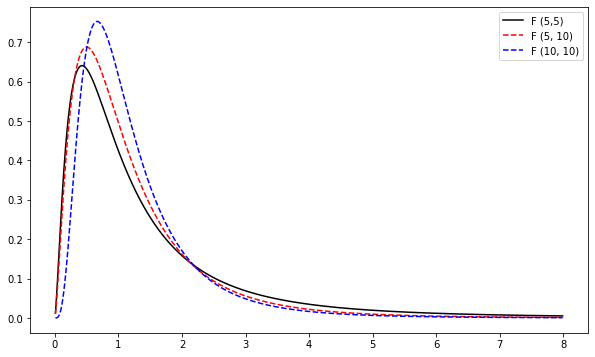

In [0]:
x = np.arange(0.01,8,0.01)

# now calculate f(x) for F distribution
f_1 = st.f.pdf(x, dfn = 5, dfd = 5)
f_2 = st.f.pdf(x, dfn = 5, dfd = 10)
f_3 = st.f.pdf(x, dfn = 10, dfd = 10)


plt.rcParams["figure.figsize"] = (10,6)
plt.plot(x, f_1, 'k', label = "F (5,5)")
plt.plot(x, f_2, '--r', label = "F (5, 10)")
plt.plot(x, f_3, '--b', label = "F (10, 10)")
plt.legend()
plt.show()

A few features stand out:

* the $F$- distribution is defined only over positive values: since both sample variances are positive, their ratio must also be a positive number; 

* it is, unlike the normal and $t$-distributions, asymmetric (those of you who've studied a bit of statistics before may recognise it as being positively skewed, with a long tail to the right of the distribution);

* the distribution peak is in the region of 1, which is of course the expected value under the null hypothesis of equal variances.

Let's perform a test: suppose that we have samples {$X$} and {$Y$} with the following key statistics:

$$n_X = 40, n_Y = 23, s_X^2 = 12.5, s_Y^2 = 20.$$

Then our test statistic is 0.625, and we compute a $p$-value as follows:


In [0]:
st.f.cdf(12.5 / 20, dfn = 39, dfd = 22)

0.09800944659489354

Clearly we cannot reject the null hypothesis of equal variances at the 5% level, despite the fact that they appear to be so far apart, whether our alternative hypothesis is one-sided or two-sided.

It's worth noting that the $t$- and $F$-tests rely on the assumption of normally distributed variables. Recall that the Central Limit Theorem guarantees that statistics such as the sample mean and sample variance will be approximately normally distributed for large samples, but for small samples we can go astray if the underlying observations do not themselves follow a normal distribution.

** Breather again**

It's another good moment to take a breath, and reflect on how well you've followed and understood the discussion above. Make sure you've got all of this under your belt before going on. In the meantime, we offer you some (really bad) statistical humour:

The Dean of the Science Faculty at the local university was having a sneaky smoke in his office, and accidentally dropped the lit cigarette in his paper recycling bin, with obvious effects. Panicked, he called in the heads of various departments to help him solve the problem:

The Head of Physics immediately got to work on the equations to figure out the amount of energy which needed to be removed from the fire to halt the combustion.

The Head of Chemistry consulted his textbooks to figure out which chemical compound would most effectively douse the fire.

The Head of Statistics ran around the department setting fire to all the other paper recycling bins. Bemused, and a little concerned about the Faculty building, the Dean demanded to know exactly what he thought he was up to.

"Well obviously", replied the statistician, "to solve the problem we need to have a much larger sample."

(Happy postscript to the story: fortunately an AI robot wandered across from the Robotics department with a fire extinguisher and saved all of the academics.)

## Testing goodness of fit and sample variances: introducing the chi-squared distribution

Now we're going to introduce ourselves to another very important and versatile distribution, the chi-squared ($\chi^2$) distribution. It has a number of uses, but for the purposes of introduction we will focus only on its application in tests of goodness of fit, i.e. how well a given model fits the observed data. 

Let's start with an example with numerical data. Suppose we are advising a factory which produces dingbats: they package their dingbats in groups of 10 and keep track of the number of reject dingbats which had to be thrown away for each successful pack of 10. They've given us this data, and we would like to model the number of rejects before getting to 10 successful dingbats as following a negative binomial process with parameters $r = 10$ and $p = 0.8$, i.e. that there is an 80% probability of a given dingbat not being a reject. Now let's compare the data for 100 packages (the variable ```obs``` below, recording the number of packages for which there were the corresponding number of rejects):

In [0]:
n = 100
exp = st.nbinom.pmf(range(7), n = 10, p = 0.8) * n

obs = [13, 21, 19, 21, 15, 5, 6]    # actual observed: 13 with 0 rejects, 21 with 1 reject and so on 

obs_0_5 = exp[0:5]
exp[6] = 100 - np.sum(obs_0_5)  # so the last value is the expected number of observations of 6 or more

Now we have the actual and observed number of packages with the respective number of rejects. Our next step is to compute a test statistic. For each possible number of rejects considered (with 6 or more as our final category), we take the difference between actual and observed numbers and then square this, before dividing by the expected number for each cell; we then sum these. (This practice of squaring differences is going to crop up a little later on, when we investigate linear regression.) It turns out that the resulting test statistic follows **approximately** the $\chi^2$ distribution, with $n-1$ degrees of freedom where $n$ is the number of cells we consider (7 in our case: each possible number of rejects from 0 to 5 inclusive, plus 6 or more as our final category). In other words, with $X_i$ denoting each observed value and $E_i$ each expected value:

$$\displaystyle \sum_{i=1}^n \frac{(X_i - E_i)^2}{E_i} = \sum_{i=1}^n \frac{X_i^2}{E_i} - n \sim \chi^2_{n-1}.$$

The chi-squared distribution is a reasonable approximation provided the expected frequencies are all above a minimum value: 5 is the general rule of thumb here, which is the reason that we terminated our data set at 6 or more rejects.

Let's compute this test statistic for our data.

In [0]:
chi = np.sum ((exp - obs)**2 / exp)
chi

6.496062913533342

Now, with our knowledge that under the null hypothesis that the negative binomial with $r=10$ and $p=0.8$ is the correct model, we can get Python to give us a $p$-value (note that the line of code below returns both the test statistic and the $p$-value):  

In [0]:
st.chisquare(obs,exp)

Power_divergenceResult(statistic=6.496062913533342, pvalue=0.36996993195979316)

With a $p$-value of 0.37, we cannot reject at any reasonable significance level the null hypothesis that this is the correct distribution underlying the data.

We can also use the chi-squared test on so-called categorical data, i.e. non-numerical data where observations are effectively classified into one of a number of buckets. For example, suppose that we're interested in the eternally fascinating question of whether left-handed university students are more likely to smoke, and so we've collected the following sample data, presented in the form of a **contingency table**: 

|              |  Smoker  |  Non-smoker |
|--------------|:--------:|:-----------:|
| Left-handed  |    24    |       87    |
| Right-handed |    111   |      778    |


Out of 1,000 students sampled, 111 (11.1%) are left-handed and 135 (13.5%) are smokers. Under the null hypothesis, left-handedness and smoker status are independent, and hence the expected number in each cell can be calculated by multiplying the two relevant probabilities by each other and the total number, as follows:

|              |  Smoker  |  Non-smoker |
|--------------|:--------:|:-----------:|
| Left-handed  | 1000(0.111)(0.135) = 14.985    | 1000(0.111)(0.865) = 96.015  |
| Right-handed | 1000(0.889)(0.135) = 120.015   | 1000(0.889)(0.865) = 768.985 |


Now we follow once more the procedure of summing the squared differences between observed and expected divided by the expected, which comes to 7.0527. The only question remaining is how many degrees of freedom are applicable to the chi-squared distribution, and for an $m$ by $n$ contingency table, the rule is df $= (m-1)(n-1)$, so for our 2x2 table there is one degree of freedom.

Let's ask Python to investigate our null hypothesis of independence:


In [0]:
obs = np.array(([24, 87, 111, 778])).reshape(2,2)

st.chi2_contingency(obs, correction=False, lambda_=None)

(7.052723315069135, 0.007914483436734756, 1, array([[ 14.985,  96.015],
        [120.015, 768.985]]))

Don't worry too much about the parameters ```correction``` and ```lambda``` for now: they're beyond the scope of our concern at this point.

The output from the above function gives us the test statistic (confirming our 7.0527), the $p$-value, the degrees of freedom (confirming that it's 1) and then an array which replicates our calculation of the expected values under the null hypothesis. The $p$-value of 0.0079 allows us to reject the null hypothesis at the 5% significance level (and even at the 1% level), and we are therefore forced to conclude that there is indeed a relationship between left-handedness and whether or not you smoke. Which would be incredibly interesting if we hadn't totally made up that data ;)

# Conclusion 

Hypothesis testing is a critical part of Data Science!  Now that we have covered some of the technical/statistical concepts, there are 2 more practical skills to practice and master:
* Practical hypothesis testing which requires you to understand **which** of these concepts to use for your problem
* Setting up testable hypotheses is a key `Explain` skill, which we will cover in more detail later on